In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [3]:
#Load the dataset
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Preprocessing

### Encoded using Label Encode

In [4]:
data1 = data.copy()

data1.drop('veil-type', axis=1, inplace=True)
data1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [5]:
columns = data1.columns
columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [7]:
data_label = data1.apply(label.fit_transform)
data_label

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [8]:
# Label for a perticular class from a column
for col in columns:
    dt = {col:data[col].unique(), 'labels':label.fit_transform(data[col].unique())}
    display(pd.DataFrame(dt).sort_values('labels'))

,class,labels
1,e,0
0,p,1


,cap-shape,labels
1,b,0
5,c,1
3,f,2
4,k,3
2,s,4
0,x,5


,cap-surface,labels
2,f,0
3,g,1
0,s,2
1,y,3


,cap-color,labels
6,b,0
8,c,1
4,e,2
3,g,3
0,n,4
5,p,5
9,r,6
7,u,7
2,w,8
1,y,9


,bruises,labels
1,f,0
0,t,1


,odor,labels
1,a,0
5,c,1
4,f,2
2,l,3
8,m,4
3,n,5
0,p,6
7,s,7
6,y,8


,gill-attachment,labels
1,a,0
0,f,1


,gill-spacing,labels
0,c,0
1,w,1


,gill-size,labels
1,b,0
0,n,1


,gill-color,labels
8,b,0
7,e,1
2,g,2
5,h,3
0,k,4
1,n,5
11,o,6
3,p,7
9,r,8
6,u,9


,stalk-shape,labels
0,e,0
1,t,1


,stalk-root,labels
4,?,0
2,b,1
1,c,2
0,e,3
3,r,4


,stalk-surface-above-ring,labels
1,f,0
2,k,1
0,s,2
3,y,3


,stalk-surface-below-ring,labels
1,f,0
3,k,1
0,s,2
2,y,3


,stalk-color-above-ring,labels
4,b,0
7,c,1
5,e,2
1,g,3
3,n,4
6,o,5
2,p,6
0,w,7
8,y,8


,stalk-color-below-ring,labels
3,b,0
8,c,1
5,e,2
2,g,3
4,n,4
7,o,5
1,p,6
0,w,7
6,y,8


,veil-color,labels
1,n,0
2,o,1
0,w,2
3,y,3


,ring-number,labels
2,n,0
0,o,1
1,t,2


,ring-type,labels
1,e,0
3,f,1
2,l,2
4,n,3
0,p,4


,spore-print-color,labels
8,b,0
3,h,1
0,k,2
1,n,3
6,o,4
5,r,5
2,u,6
4,w,7
7,y,8


,population,labels
2,a,0
5,c,1
1,n,2
0,s,3
3,v,4
4,y,5


,habitat,labels
3,d,0
1,g,1
6,l,2
2,m,3
4,p,4
0,u,5
5,w,6


### Encoded using OneHot Encode

In [9]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

In [10]:
data_onehot = pd.get_dummies(data1.iloc[:,1:])
data_onehot['class'] = label.fit_transform(data1['class'])
data_onehot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
column_2_class = []
column_classes = []
for col in columns:
    if len(data[col].value_counts().index) == 2:
        column_2_class.append(col)
    else:
        column_classes.append(col)

In [12]:
data_onehot_edit = data1[column_2_class].apply(label.fit_transform)
data_onehot_edit1 = data_onehot_edit.copy()
data_hot = pd.get_dummies(data1[column_classes])
# data_onehot_edit[data_hot.columns.tolist()] = data_hot[data_hot.columns.tolist()]
data_onehot_edit = pd.concat([data_onehot_edit1, data_hot], axis=1)
data_onehot_edit

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,1,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# Model Building

## 1). Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

In [14]:
# Spliting into X, y
X_one = data_onehot.iloc[:,:-1]
y_one = data_onehot.iloc[:,-1]

# X_lable, y_lable

In [15]:
# split X and y into training and testing sets
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_one, y_one, test_size = 0.2, random_state = 0)

In [16]:
#Logistic regression and fit the model
logistic = LogisticRegression()
logistic.fit(Xo_train,yo_train)

LogisticRegression()

#### Training Accuracy

In [17]:
#Predict for X dataset
y_train_predict_log = logistic.predict(Xo_train)

In [18]:
train_acc_score = accuracy_score(yo_train, y_train_predict_log)
train_f1_score = f1_score(yo_train, y_train_predict_log)
print('Train Accuracy Score : ' , train_acc_score)
print('Train F1 Score : ' , train_f1_score)

# print classification report
print('\n\n',classification_report(yo_train, y_train_predict_log, digits=4))

Train Accuracy Score :  1.0
Train F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3356
           1     1.0000    1.0000    1.0000      3143

    accuracy                         1.0000      6499
   macro avg     1.0000    1.0000    1.0000      6499
weighted avg     1.0000    1.0000    1.0000      6499



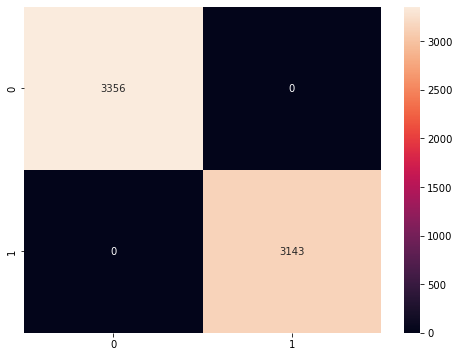

In [19]:
cm = confusion_matrix(yo_train,y_train_predict_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

#### Testing Accuracy

In [20]:
y_test_predict_log = logistic.predict(Xo_test)

In [21]:
test_acc_score = accuracy_score(yo_test, y_test_predict_log)
test_f1_score = f1_score(yo_test, y_test_predict_log)
print('Test Accuracy Score : ' , test_acc_score)
print('Test F1 Score : ' , test_f1_score)

# print classification report
print('\n\n',classification_report(yo_test, y_test_predict_log, digits=4))

Test Accuracy Score :  1.0
Test F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       852
           1     1.0000    1.0000    1.0000       773

    accuracy                         1.0000      1625
   macro avg     1.0000    1.0000    1.0000      1625
weighted avg     1.0000    1.0000    1.0000      1625



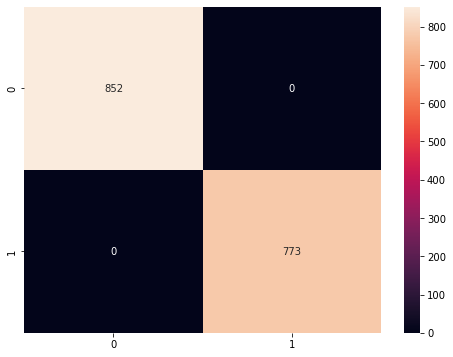

In [22]:
cm = confusion_matrix(yo_test,y_test_predict_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

## 2). K-NN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix

In [24]:
# Spliting into X, y
X_label = data_label.iloc[:,1:]
y_label = data_label.iloc[:,0]

# X_lable, y_lable

In [25]:
# split X and y into training and testing sets
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_label, y_label, test_size = 0.2, random_state = 0)

In [26]:
kfold = KFold(n_splits=5)

In [27]:
model = KNeighborsClassifier()
results = cross_val_score(model, X_label, y_label, cv=kfold)
results.mean()

0.90804660856385

#### Hyper Parameter Tunning

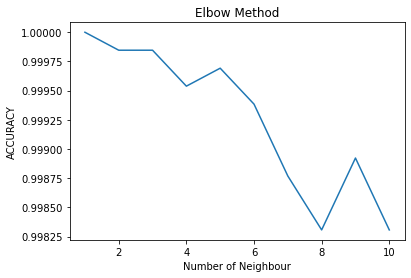

In [28]:
#Elbow Plot
acc = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xl_train , yl_train)
    y_predict = knn.predict(Xl_train)
    acc.append(accuracy_score(yl_train , y_predict))
    
plt.plot(range(1, 11), acc)
plt.title('Elbow Method')
plt.xlabel('Number of Neighbour')
plt.ylabel('ACCURACY')
plt.show()

In [29]:
# Hyper parameter Value
kfold = KFold()
n_neighbors = np.array(range(1,10))
param_grid = {'n_neighbors':n_neighbors}

# Hyper parameter tunning using GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid , cv = kfold)
grid.fit(Xl_train, yl_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [30]:
print(grid.best_score_)
print(grid.best_params_)

0.9995384615384616
{'n_neighbors': 1}


### K-NN Model Building

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xl_train, yl_train)

KNeighborsClassifier(n_neighbors=1)

#### Training Accuracy

In [32]:
#Predict for X dataset
y_train_predict_knn = knn.predict(Xl_train)

train_acc_score = accuracy_score(yl_train, y_train_predict_knn)
train_f1_score = f1_score(yl_train, y_train_predict_knn)
print('Train Accuracy Score : ' , train_acc_score)
print('Train F1 Score : ' , train_f1_score)

# print classification report
print('\n\n',classification_report(yl_train, y_train_predict_knn, digits=4))

Train Accuracy Score :  1.0
Train F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3356
           1     1.0000    1.0000    1.0000      3143

    accuracy                         1.0000      6499
   macro avg     1.0000    1.0000    1.0000      6499
weighted avg     1.0000    1.0000    1.0000      6499



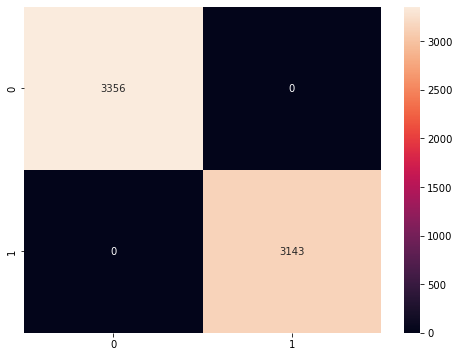

In [33]:
cm = confusion_matrix(yl_train,y_train_predict_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

#### Testing Accuracy

In [34]:
y_test_predict_knn = knn.predict(Xl_test)

test_acc_score = accuracy_score(yl_test, y_test_predict_knn)
test_f1_score = f1_score(yl_test, y_test_predict_knn)
print('Test Accuracy Score : ' , test_acc_score)
print('Test F1 Score : ' , test_f1_score)

# print classification report
print('\n\n',classification_report(yl_test, y_test_predict_knn, digits=4))

Test Accuracy Score :  0.9987692307692307
Test F1 Score :  0.9987080103359173


               precision    recall  f1-score   support

           0     1.0000    0.9977    0.9988       852
           1     0.9974    1.0000    0.9987       773

    accuracy                         0.9988      1625
   macro avg     0.9987    0.9988    0.9988      1625
weighted avg     0.9988    0.9988    0.9988      1625



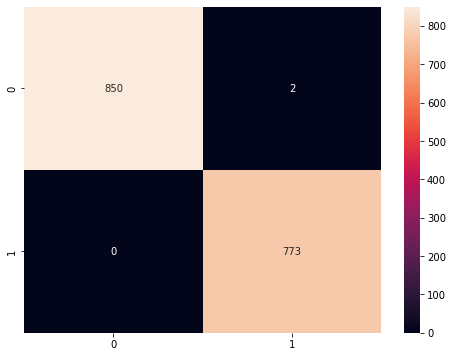

In [35]:
cm = confusion_matrix(yo_test,y_test_predict_knn)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

## 3). SVM

In [36]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split , GridSearchCV , KFold, cross_val_score
from sklearn.metrics import classification_report , accuracy_score , f1_score

In [37]:
# Spliting into X, y
X_label = data_label.iloc[:,1:]
y_label = data_label.iloc[:,0]

# X_lable, y_lable

In [38]:
# split X and y into training and testing sets
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_label, y_label, test_size = 0.2, random_state = 0)

In [39]:
kfold = KFold(n_splits=5)

In [40]:
model = SVC()
result = cross_val_score(model, X_label, y_label, cv=kfold)
result.mean()

0.8260674497915877

#### Hyper Parameter Tunning

In [41]:
param_grid ={'kernel':['poly', 'rbf', 'sigmoid'], 'gamma':[0.5,0.1,0.01,'scale', 'auto'], 'C':[10,0.1,0.001,0.0001]}

model = SVC()
gsv = GridSearchCV(model,param_grid,cv=kfold)
gsv.fit(Xl_train,yl_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [10, 0.1, 0.001, 0.0001],
                         'gamma': [0.5, 0.1, 0.01, 'scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [42]:
print(gsv.best_score_)
print(gsv.best_params_)

1.0
{'C': 10, 'gamma': 0.5, 'kernel': 'poly'}


### SVM Model Building

In [43]:
svm = SVC(C=10, kernel='poly', gamma=0.5)
svm.fit(Xl_train, yl_train)

SVC(C=10, gamma=0.5, kernel='poly')

#### Training Accuracy

In [44]:
#Predict for X dataset
y_train_predict_svm = svm.predict(Xl_train)

train_acc_score = accuracy_score(yl_train, y_train_predict_svm)
train_f1_score = f1_score(yl_train, y_train_predict_svm)
print('Train Accuracy Score : ' , train_acc_score)
print('Train F1 Score : ' , train_f1_score)

# print classification report
print('\n\n',classification_report(yl_train, y_train_predict_svm, digits=4))

Train Accuracy Score :  1.0
Train F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3356
           1     1.0000    1.0000    1.0000      3143

    accuracy                         1.0000      6499
   macro avg     1.0000    1.0000    1.0000      6499
weighted avg     1.0000    1.0000    1.0000      6499



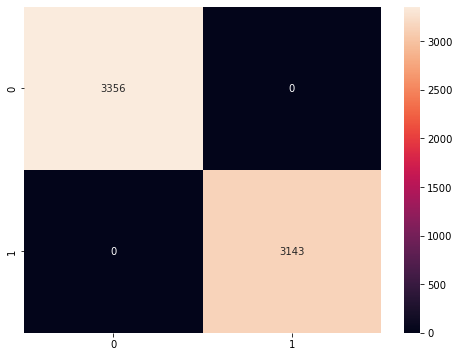

In [45]:
cm = confusion_matrix(yl_train,y_train_predict_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

#### Testing Accuracy

In [46]:
y_test_predict_svm = svm.predict(Xl_test)

test_acc_score = accuracy_score(yl_test, y_test_predict_svm)
test_f1_score = f1_score(yl_test, y_test_predict_svm)
print('Test Accuracy Score : ' , test_acc_score)
print('Test F1 Score : ' , test_f1_score)

# print classification report
print('\n\n',classification_report(yl_test, y_test_predict_svm, digits=4))

Test Accuracy Score :  1.0
Test F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       852
           1     1.0000    1.0000    1.0000       773

    accuracy                         1.0000      1625
   macro avg     1.0000    1.0000    1.0000      1625
weighted avg     1.0000    1.0000    1.0000      1625



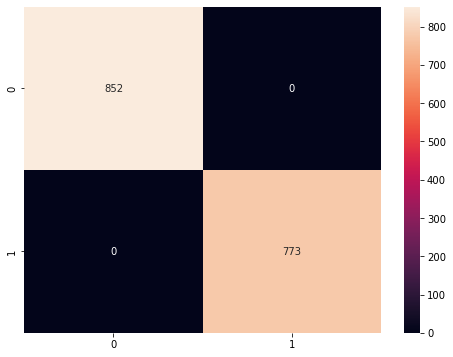

In [47]:
cm = confusion_matrix(yo_test,y_test_predict_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

## 4). Decision Tree

In [48]:
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV , KFold, cross_val_score
from sklearn.metrics import classification_report , accuracy_score , f1_score

In [49]:
# Spliting into X, y
X_label = data_label.iloc[:,1:]
y_label = data_label.iloc[:,0]

# X_lable, y_lable

In [50]:
# split X and y into training and testing sets
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_label, y_label, test_size = 0.2, random_state = 0)

In [51]:
kfold = KFold(n_splits=5)

In [52]:
model = DecisionTreeClassifier()
result = cross_val_score(model, X_label, y_label, cv=kfold)
result.mean()

0.9918726790450929

#### Hyper Parameter Tunning

In [53]:
params = {'criterion':['entropy','gini'] ,'max_depth': [2,4,6,8,10,12], 'min_samples_split': [2,3,4]}

model_test = DecisionTreeClassifier()
gcv = GridSearchCV(estimator=model_test,param_grid=params)
gcv.fit(Xl_train,yl_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 3, 4]})

In [54]:
print(gcv.best_score_)
print(gcv.best_params_)

1.0
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 2}


### Decision Tree Model Building

In [55]:
tre = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=2)
tre.fit(Xl_train, yl_train)

DecisionTreeClassifier(max_depth=8)

In [56]:
fn = list(data_label.iloc[:,1:].columns)
cn=['edible', 'poisonous']
fig = plt.figure(figsize=(40,50), dpi=300)
tree.plot_tree(tre, feature_names = fn, class_names=cn, filled = True, fontsize=17);

In [57]:
fea_imp = {'columns':columns[1:].tolist(), 'importance':tre.feature_importances_}
feature_importance = pd.DataFrame(fea_imp)
feature_importance.sort_values('importance',ascending = False, inplace=True)
feature_importance = feature_importance.reset_index().drop('index', axis=1)
feature_importance

,columns,importance
0,gill-color,0.343691
1,spore-print-color,0.196162
2,population,0.178558
3,gill-size,0.132124
4,stalk-root,0.051671
5,bruises,0.030199
6,stalk-shape,0.023943
7,stalk-color-above-ring,0.018322
8,habitat,0.014358
9,veil-color,0.004031


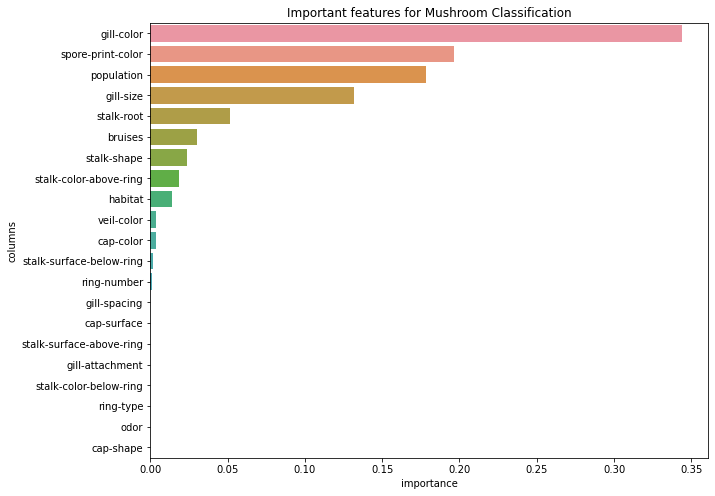

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(y='columns',x='importance', data=feature_importance).set(title='Important features for Mushroom Classification')
plt.show()

#### Training Accuracy

In [59]:
#Predict for X dataset
y_train_predict_tree = tre.predict(Xl_train)

train_acc_score = accuracy_score(yl_train, y_train_predict_tree)
train_f1_score = f1_score(yl_train, y_train_predict_tree)
print('Train Accuracy Score : ' , train_acc_score)
print('Train F1 Score : ' , train_f1_score)

# print classification report
print('\n\n',classification_report(yl_train, y_train_predict_tree, digits=4))

Train Accuracy Score :  1.0
Train F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3356
           1     1.0000    1.0000    1.0000      3143

    accuracy                         1.0000      6499
   macro avg     1.0000    1.0000    1.0000      6499
weighted avg     1.0000    1.0000    1.0000      6499



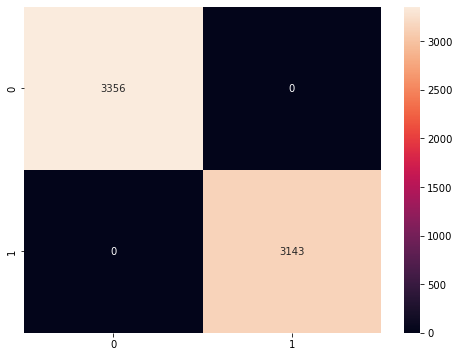

In [60]:
cm = confusion_matrix(yl_train,y_train_predict_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

#### Testing Accuracy

In [61]:
y_test_predict_tree = tre.predict(Xl_test)

test_acc_score = accuracy_score(yl_test, y_test_predict_tree)
test_f1_score = f1_score(yl_test, y_test_predict_tree)
print('Test Accuracy Score : ' , test_acc_score)
print('Test F1 Score : ' , test_f1_score)

# print classification report
print('\n\n',classification_report(yl_test, y_test_predict_tree, digits=4))

Test Accuracy Score :  1.0
Test F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       852
           1     1.0000    1.0000    1.0000       773

    accuracy                         1.0000      1625
   macro avg     1.0000    1.0000    1.0000      1625
weighted avg     1.0000    1.0000    1.0000      1625



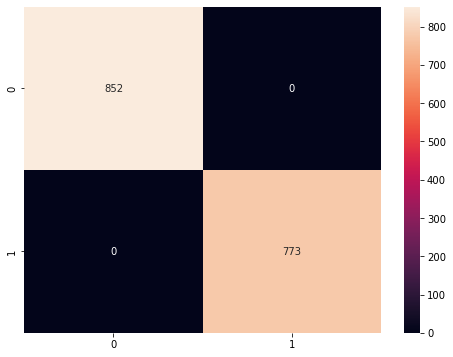

In [62]:
cm = confusion_matrix(yo_test,y_test_predict_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.show()

### Droping that feature which have zero importance and then we train the Decision tree Model

In [63]:
use_cols = feature_importance[feature_importance['importance']>0]['columns'].tolist()
use_cols.append('class')
use_cols

['gill-color',
 'spore-print-color',
 'population',
 'gill-size',
 'stalk-root',
 'bruises',
 'stalk-shape',
 'stalk-color-above-ring',
 'habitat',
 'veil-color',
 'cap-color',
 'stalk-surface-below-ring',
 'ring-number',
 'class']

In [64]:
final_data = data_label[use_cols]
final_data

,gill-color,spore-print-color,population,gill-size,stalk-root,bruises,stalk-shape,stalk-color-above-ring,habitat,veil-color,cap-color,stalk-surface-below-ring,ring-number,class
0,4,2,3,1,3,1,0,7,5,2,4,2,1,1
1,4,3,2,0,2,1,0,7,1,2,9,2,1,0
2,5,3,2,0,2,1,0,7,3,2,8,2,1,0
3,5,2,3,1,3,1,0,7,5,2,8,2,1,1
4,4,3,0,0,3,0,1,7,1,2,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,11,0,1,0,0,0,0,5,2,1,4,2,1,0
8120,11,0,4,0,0,0,0,5,2,0,4,2,1,0
8121,5,0,1,0,0,0,0,5,2,1,4,2,1,0
8122,0,7,4,1,0,0,1,7,2,2,4,1,1,1


In [65]:
# Spliting into X, y
X_label = final_data.iloc[:,:-1]
y_label = final_data.iloc[:,-1]

# X_lable, y_lable

In [66]:
# split X and y into training and testing sets
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X_label, y_label, test_size = 0.2, random_state = 0)

In [67]:
tre = DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_split=2)
tre.fit(Xl_train, yl_train)

DecisionTreeClassifier(max_depth=8)

#### Training Accuracy

In [68]:
#Predict for X dataset
y_train_predict_tree = tre.predict(Xl_train)

train_acc_score = accuracy_score(yl_train, y_train_predict_tree)
train_f1_score = f1_score(yl_train, y_train_predict_tree)
print('Train Accuracy Score : ' , train_acc_score)
print('Train F1 Score : ' , train_f1_score)

# print classification report
print('\n\n',classification_report(yl_train, y_train_predict_tree, digits=4))

Train Accuracy Score :  1.0
Train F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      3356
           1     1.0000    1.0000    1.0000      3143

    accuracy                         1.0000      6499
   macro avg     1.0000    1.0000    1.0000      6499
weighted avg     1.0000    1.0000    1.0000      6499



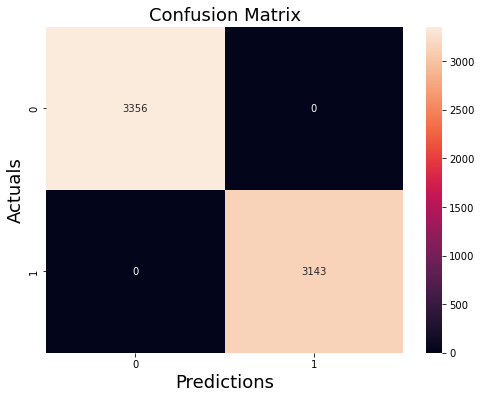

In [69]:
cm = confusion_matrix(yl_train,y_train_predict_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Testing Accuracy

In [70]:
y_test_predict_tree = tre.predict(Xl_test)

test_acc_score = accuracy_score(yl_test, y_test_predict_tree)
test_f1_score = f1_score(yl_test, y_test_predict_tree)
print('Test Accuracy Score : ' , test_acc_score)
print('Test F1 Score : ' , test_f1_score)

# print classification report
print('\n\n',classification_report(yl_test, y_test_predict_tree, digits=4))

Test Accuracy Score :  1.0
Test F1 Score :  1.0


               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       852
           1     1.0000    1.0000    1.0000       773

    accuracy                         1.0000      1625
   macro avg     1.0000    1.0000    1.0000      1625
weighted avg     1.0000    1.0000    1.0000      1625



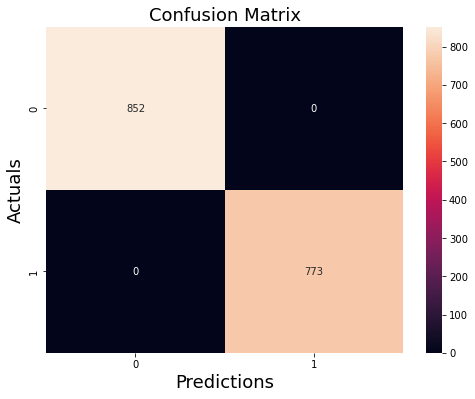

In [71]:
cm = confusion_matrix(yo_test,y_test_predict_tree)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()